<a href="https://colab.research.google.com/github/n9quan/QR_Colab/blob/main/WS_1_2_Import_file_line_chart_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The behaviour of average surface temperature over time

In the questions below, we look at data from NASA about land–ocean temperature anomalies in the northern hemisphere. The figure below is constructed using this data, and shows temperatures in the northern hemisphere over the period 1880–2016, expressed as differences from the average temperature from 1951 to 1980. We start by creating charts similar to the figure in order to visualize the data and spot patterns more easily.

![](https://www.core-econ.org/doing-economics/book/images/web/figure-01-01.jpg)

**Figure:** Northern hemisphere temperatures (1880–2016).

Before plotting any charts, download the data and make sure you understand how temperature is measured:

* Go to NASA’s [Goddard Institute for Space Studies website](https://tinyco.re/2515719).
* Under the subheading ‘Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies’, select the CSV version of ‘Northern Hemisphere-mean monthly, seasonal, and annual means’ (right-click and select ‘Save Link As…’).
* The default name of this file is NH.Ts+dSST.csv. Save it in an easily accessible location, such as a folder on your Desktop or in your personal folder.

**Exercise:** In this dataset, temperature is measured as ‘anomalies’ rather than as absolute temperature. Using NASA’s [Frequently Asked Questions section](https://tinyco.re/8370199) as a reference, explain in your own words what temperature ‘anomalies’ means. Why have researchers chosen this particular measure over other measures (such as absolute temperature)?


**Answer**: I think temperature "anomalies" are the difference of the measured temperature and the baseline temperature. Researchers have chosen this particular measure over other measures (such as absolute temperature) because temperature "anomalies" are more easier to compare and show the temperature trends than the absolute temperature. 


## Importing the datafile into Python

First, we have to import the datafile called ‘NH.Ts+dSST.csv’ into Python. To do so, we will be using a Python library called [pandas](https://pandas.pydata.org). Before you can use a library, you have to "import" it.

In [ ]:
import pandas as pd

It is conventional to import `pandas` as `pd`, which means we can refer to it by the short name `pd` rather than the longer name `pandas`. This is also one of the few lines that will appear in almost every Python file you create for this course. Note that pretty much everything is case-sensitive, which means that `pandas` is not the same as `Pandas`.

There are multiple ways to upload your .csv file into Colab. This notebook provides you with one way in which you load the data file directly from your local files. Run the following code then click on “Choose Files”, select the .csv file, and upload it. You can reuse this code in your project work.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NH.Ts+dSST.csv to NH.Ts+dSST.csv


Since our data is in csv format, we use the `read_csv` function to import the data into Python. Python uses `.` (a dot) to mean "part of". So to refer to the `read_csv` function, which is part of the `pandas` library, we say `pd.read_csv`. We will call our file `tempdata` (short for ‘temperature data’). If you use this code with any other data, you will need to adjust the file name accordingly.

In [ ]:
import io
tempdata = pd.read_csv(io.BytesIO(uploaded["NH.Ts+dSST.csv"]), skiprows = 1, na_values = "***")

When using this function, we added two options. If you open the spreadsheet in Excel, you will see that the real data table only starts in Row 2, so we use the `skiprows = 1` option to skip the first row when importing the data. When looking at the spreadsheet, you can see that missing temperature data is coded as `"***"`. In order for Python to recognize the non-missing temperature data as numbers, we use the `na_values = "***"` option to indicate that missing observations in the spreadsheet are coded as `"***"`.

To check that the data has been imported correctly, you can use the head function to view the first five rows of the dataset, and confirm that they correspond to the columns in the csv file.

In [ ]:
tempdata.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.36,-0.51,-0.23,-0.3,-0.06,-0.16,-0.19,-0.27,-0.24,-0.32,-0.43,-0.40,-0.29,NaN,NaN,-0.20,-0.21,-0.33
1,1881,-0.31,-0.22,-0.04,0.0,0.03,-0.32,0.08,-0.04,-0.26,-0.44,-0.37,-0.24,-0.18,-0.19,-0.31,0.00,-0.10,-0.36
2,1882,0.26,0.21,0.02,-0.3,-0.23,-0.28,-0.28,-0.16,-0.26,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
3,1883,-0.58,-0.66,-0.15,-0.3,-0.25,-0.11,-0.05,-0.22,-0.34,-0.16,-0.45,-0.15,-0.29,-0.33,-0.64,-0.23,-0.13,-0.32
4,1884,-0.17,-0.11,-0.64,-0.6,-0.36,-0.41,-0.41,-0.51,-0.45,-0.44,-0.57,-0.47,-0.43,-0.40,-0.14,-0.53,-0.44,-0.49


In [ ]:
print(tempdata)

     Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0    1880 -0.36 -0.51 -0.23 -0.30 -0.06 -0.16 -0.19 -0.27 -0.24 -0.32 -0.43   
1    1881 -0.31 -0.22 -0.04  0.00  0.03 -0.32  0.08 -0.04 -0.26 -0.44 -0.37   
2    1882  0.26  0.21  0.02 -0.30 -0.23 -0.28 -0.28 -0.16 -0.26 -0.52 -0.34   
3    1883 -0.58 -0.66 -0.15 -0.30 -0.25 -0.11 -0.05 -0.22 -0.34 -0.16 -0.45   
4    1884 -0.17 -0.11 -0.64 -0.60 -0.36 -0.41 -0.41 -0.51 -0.45 -0.44 -0.57   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
138  2018  1.13  1.23  1.16  0.96  1.01  0.86  0.90  0.87  0.96  1.23  0.96   
139  2019  1.19  1.12  1.54  1.24  0.98  1.19  1.03  1.08  1.21  1.30  1.19   
140  2020  1.57  1.70  1.65  1.40  1.28  1.13  1.10  1.13  1.20  1.21  1.60   
141  2021  1.26  0.95  1.20  1.12  1.03  1.20  1.06  1.02  1.05  1.30  1.30   
142  2022  1.24  1.16  1.42  1.09  1.01  1.12  1.05  1.16  1.15  1.31  1.08   

      Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  

In order to extract data from one column of the data table, simply use the syntax

`DataTable["column's name"]`

In [ ]:
tempdata["Year"]

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
138    2018
139    2019
140    2020
141    2021
142    2022
Name: Year, Length: 143, dtype: int64

## Drawing a line chart of temperature and time

Now we will create some line charts using monthly, seasonal, and annual data, which help us look for general patterns over time.

To do so, we will use another library called [Matplotlib](https://matplotlib.org) to help us to plot data and to visualize graphs. More specifically, we'll use a part of it called Pyplot, which we'll import with the nickname `plt`.

In [ ]:
import matplotlib.pyplot as plt

We can use the names of the columns of our data to draw line charts using the `plot` function. As an example, we will draw a line chart using data for January for the years 1880–2021. The `title` command adds a chart title, and the `axhline` command draws a horizontal line according to our specifications.

In [ ]:
f

Try different values for `color` to figure out what these options do (some online research could help). `xlabel` and `ylabel` define the respective axis titles.

It is important to remember that all axis and chart titles should be enclosed in quotation marks (`""`), as well as any words that are not options (for example, colour names or filenames).

**Exercise:** Choose one month and plot a line chart with average temperature anomaly on the vertical axis and time (from 1880 to the latest year available) on the horizontal axis. Label each axis appropriately and give your chart a suitable title.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NH.Ts+dSST.csv to NH.Ts+dSST.csv


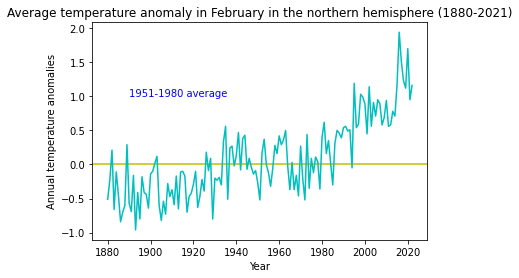

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
tempdata = pd.read_csv(io.BytesIO(uploaded["NH.Ts+dSST.csv"]), skiprows = 1, na_values = "***")
# tempdata.head()
# print(tempdata)

# Add a horizontal line (at y = 0)
plt.axhline(y=0, color="y")

# Add a label to the horizontal line
plt.text(1890, 1.0, "1951-1980 average", color="b") 

plt.xlabel("Year")
plt.ylabel("Annual temperature anomalies")

# Add a title
plt.title("Average temperature anomaly in February in the northern hemisphere (1880-2021)")

plt.plot(tempdata["Year"], tempdata["Feb"], color = "c")

# Producing a line chart for the annual temperature anomalies

The column labelled `J–D` contains the average temperature anomaly for each year.

**Exercise:** Plot a line chart with annual average temperature anomaly on the vertical axis and time (from 1880 to the latest year available) on the horizontal axis. Your chart should look like the figure at the beginning of this notebook.

**Extension:** Add a horizontal line that intersects the vertical axis at 0, and label it ‘1951–1980 average’.

Text(0.5, 1.0, 'Average temperature anomaly in January in the northern hemisphere (1880-2021)')

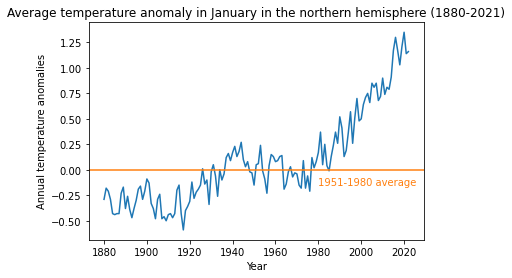

In [ ]:
plt.plot(tempdata["Year"], tempdata["J-D"], color = "tab:blue")

plt.xlabel("Year")
plt.ylabel("Annual temperature anomalies")

# Add a horizontal line (at y = 0)
plt.axhline(y=0, color="tab:orange")

# Add a label to the horizontal line
plt.text(1980, -0.15, "1951-1980 average", color="tab:orange") 

# Add a title
plt.title("Average temperature anomaly in January in the northern hemisphere (1880-2021)")

This is where the power of programming languages becomes evident: to produce the same line chart for a different variable, we simply take the code used in the example above and replace the variable name `Jan` with the name for the annual variable (`J–D`).

## Optional: Data Smoothing

The figure you just produced shows an upward trend in the data, however the data oscillates quite a bit. To aid with being able to see such patterns or trends in data, we need to find a way to remove, or at least dampen, these oscillations in our data. Data smoothing is a method in statistics that does precisely this!

There are many different smoothing algorithms with each intending to solve a specific issue with approximating a function that best fits the data. The smoothing algorithm we are going to use is referred to as a moving (or rolling) average. A moving average, as the name suggests, involves taking a series of averages of a moving subset of our data.

In Python, we will use the following commands to smooth and graph our data.

In [ ]:
tempdata["J-D"].rolling(window = 10).mean()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
138    0.954
139    1.003
140    1.048
141    1.088
142    1.123
Name: J-D, Length: 143, dtype: float64

This takes the column with the average temperature anomaly for each year,  calculates moving subsets of the data, and then computes the mean for each subset. You can also use this command when creating a graph.

**Exercise:** Create another line chart with the annual average temperature anomaly. This time, also plot the moving average for the data.

Text(0.5, 1.0, 'Average temperature anomaly in January in the northern hemisphere (1880-2021)')

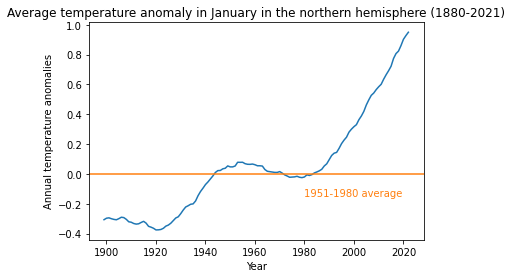

In [ ]:
plt.plot(tempdata["Year"], tempdata["J-D"].rolling(window = 20).mean(), color = "tab:blue")

plt.xlabel("Year")
plt.ylabel("Annual temperature anomalies")

# Add a horizontal line (at y = 0)
plt.axhline(y=0, color="tab:orange")

# Add a label to the horizontal line
plt.text(1980, -0.15, "1951-1980 average", color="tab:orange") 

# Add a title
plt.title("Average temperature anomaly in January in the northern hemisphere (1880-2021)")

One parameter we need to provide in the function calls is `window`. Above, we set this parameter to 20, but why? In the following questions, you will investigate what happens when you increase and decrease the value of `window` to better understand how this value is chosen.

**Exercise:** Please answer the following questions.

1. How does the smoothed curve change when you lower the value of `window`?
2. How does the smoothed curve change when you raise the value of `window`?
3. Based on your answers to the first and second questions, what is the trade-off in choosing the value of `window`?

**Answer:** 
  1. The smooth curve shows more oscillations when I lower the value of window.
  2. The smooth curve shows less oscillations when I raise the value of window, specifically it makes the data trend line in the graph more smooth.
  3. Based on my answers to the first and second questions, the trade-off in choosing the value of window is that if we lower the value of window, we will able to see more detail and specific oscillations of the data but in the other hand it will make the graph harder to observe when it comes to observing the pattern or the trend of the graph. When we increase the value of window, it will make it easier for us to observe the trend of the data but in constrast it is harder to see the specific data oscillations. 
